In [30]:
import collections
import random
import string

class KeyValueQueue:
    def __init__(self):
        self.queue = collections.deque()

    def insert(self, key, value):
        self.queue.append((key, value))

    def extract(self):
        if self.queue:
            return self.queue.popleft()
        else:
            return None

def generate_random_key():
    return random.randint(0, 2**32 - 1)

def generate_random_string(length=64):
    letters = string.ascii_letters + string.digits
    return ''.join(random.choice(letters) for _ in range(length))

def generate_random_key_value_pairs(num_pairs):
    key_value_pairs = []
    for _ in range(num_pairs):
        key = generate_random_key()
        value = generate_random_string()
        key_value_pairs.append((key, value))
    return key_value_pairs

num_pairs = 10000
key_value_pairs = generate_random_key_value_pairs(num_pairs)

queue = KeyValueQueue()

for pair in key_value_pairs:
    queue.insert(pair[0], pair[1])


In [31]:

bucket_queues = {}  # Dictionary to store bucket queues
index = {}  # Dictionary to store the index of original keys

print("Extracted key-value pairs:")
while True:
    extracted_pair = queue.extract()
    if extracted_pair is None:
        break
    original_key = extracted_pair[0]
    hashed_key = hash(original_key)
    binary_hashed_key = bin(hashed_key & 0xFFFFFFFF)[2:]
    bucket_key = binary_hashed_key[:10]  # Take the first 10 digits of binary_hashed_key
    leftover_lsbs = binary_hashed_key[10:]  # Take the leftover LSBs
    
    if bucket_key not in bucket_queues:
        bucket_queues[bucket_key] = KeyValueQueue()  # Create a new KeyValueQueue
    
    bucket_queues[bucket_key].insert(leftover_lsbs, extracted_pair[1])  # Insert into the specific bucket queue
    index[original_key] = (bucket_key)  # Store the bucket key and leftover LSBs in the index



Extracted key-value pairs:


In [32]:
bucket_keys = list(bucket_queues.keys())
num_buckets = len(bucket_keys)
print("Round Robin Bucket Iteration:")
for i in range(num_pairs):  # Iterate for a total of num_pairs times (each bucket once)
    bucket_key = bucket_keys[i % num_buckets]  # Round-robin selection of bucket
    bucket_queue = bucket_queues[bucket_key]
    
    extracted_pair = bucket_queue.extract()
    if extracted_pair is not None:
        leftover_lsbs = extracted_pair[0]
        value = extracted_pair[1]
        print(f"Bucket Key: {bucket_key}, Leftover LSBs: {leftover_lsbs}, Value: {value}")

Round Robin Bucket Iteration:
Bucket Key: 1101011010, Leftover LSBs: 0110110111111011100100, Value: UvGK8dM599OG05kZo9q3khC4EVbKy4JYN8DKmaRMHbdSy6UldlZZFuCjIO5JjMoK
Bucket Key: 1110100010, Leftover LSBs: 1010000100111010110111, Value: pMR544W3Covyw0DQWuYpPe4ZwoRrEkarh5CLeHSuZ74QCQV6NnPV5KDbCQ7Z0Gf0
Bucket Key: 1000011000, Leftover LSBs: 111011001001010100011, Value: N3W4lpA4pCbxEiqklinvqRaPGNkY4gahXCQNx9xzzbiwPRfkXOZ854S6O9mKwcZV
Bucket Key: 1100100000, Leftover LSBs: 000101111101010011010, Value: IBQgH6dwe8LWqkR34AScd2nfIf5kMKmqZjR4nzS8P3WDwSUnX68vY7fAsOO744sn
Bucket Key: 1100011010, Leftover LSBs: 1110100010100111110101, Value: GbxumCuJc2w44M0ywhHu1LI454KqZc0FSt82079XFWN57WN84xRtOCXv4ztDq11h
Bucket Key: 1001110111, Leftover LSBs: 0010111111011100101000, Value: HhWnAtY37kZp1uov6y5DyvvGKBli53AvuWcbRg2Jj3k9iL3BeDTUrSlGGxYjl7LS
Bucket Key: 1010000100, Leftover LSBs: 0110010110001001000001, Value: jzhZLT5ZA7N5CJDMnahvmudPMDBc1XfWgJJtCpgzbCzVzAWXWVBCW50UBDI6sHs7
Bucket Key: 1010001101, Lef

In [33]:
index

{3600514788: '1101011010',
 3903344311: '1110100010',
 1126011555: '1000011000',
 1677916826: '1100100000',
 3334089205: '1100011010',
 2647389992: '1001110111',
 2702795329: '1010000100',
 1371074877: '1010001101',
 2938986574: '1010111100',
 13657240: '1101000001',
 2966982295: '1011000011',
 3174837076: '1011110100',
 3012468685: '1011001110',
 4212579877: '1111101100',
 2757923159: '1010010001',
 2055165914: '1111010011',
 1309285059: '1001110000',
 2503256610: '1001010100',
 831398176: '1100011000',
 1817909740: '1101100010',
 153581858: '1001001001',
 300141836: '1000111100',
 2515692072: '1001010111',
 1389581914: '1010010110',
 205344958: '1100001111',
 1413720369: '1010100010',
 2887819061: '1010110000',
 3489454491: '1100111111',
 3399573535: '1100101010',
 2115765126: '1111110000',
 1330933640: '1001111010',
 2657324274: '1001111001',
 1091476623: '1000001000',
 795098700: '1011110110',
 4129292395: '1111011000',
 404984389: '1100000100',
 2560466895: '1001100010',
 19930609

TypeError: object of type 'KeyValueQueue' has no len()

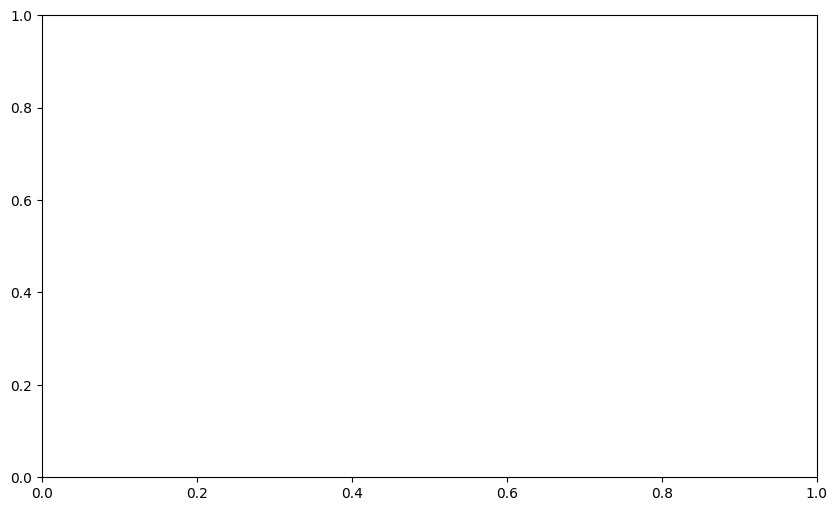

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(bucket_queues.keys(), [len(bucket) for bucket in bucket_queues.values()])
ax.set_xlabel("Bucket Key")
ax.set_ylabel("Number of Items")
ax.set_title("Number of Items in Each Bucket")
plt.show()